<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Nuevos/MN20221_Catenaria_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada

**Nombre:** 

Jaime A. Valencia

Esteban Velilla

**Email:**

jalejandro.valencia@udea.edu.co

esteban.velilla@udea.edu.co

**Curso:**
Metodos numericos

**Fecha:**
Martes 11 de octubre del 2022

# Descripcion

**Objetivos:**

Solucion numerica de la ecuacion diferencial de segundo orden con condiciones de frontera que describe la curva Catenaria de un cable tendido entre 2 soportes. Metodo del disparo.
Revision: martes 2022-oct-11

**Desarrollo:**

1.   Programacion de funcion
2.   Solucion con Scipy
3.   Representacion grafica


# Programacion de funcion



Cable tendido


$ \frac{d^{2}y}{dx^{2}} =  \frac{w_{0}}{T_{0}}\sqrt{1 + (\frac{dy}{dx})^{2}}  $

$y(0)= 185.0$

$y(900) = 100.0$

Cambio de variables para transformar la ED de orden 2 en una ED vectorial de orden 1.

$ \overline u = \begin{bmatrix}u_{0}, & u_{1} \ \end{bmatrix}=\begin{bmatrix}y, & y' \ \end{bmatrix} $

$ \frac{d}{dt}  \overline u = \begin{bmatrix}y', & y'' \ \end{bmatrix} = \begin{bmatrix}u_{1}, & \frac{w_{0}}{T_{0}}\sqrt{1 + (\frac{dy}{dx})^{2}}\ \end{bmatrix}$





In [1]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


def FunCaten01(U, x,wo=40,To=50000):
    """U: funcion vectorial dependiente de x
       x: variable independiente
       U = [y, y']
       
    """

    uo = U[0] 
    u1 = U[1] 
    d_uo = u1
    d_u1 = (wo/To)*np.sqrt(1+ u1**2)
    res = np.array([d_uo, d_u1])
    return res


# Solucion con scipy

In [2]:
#condiciones de frontera
# condiciones de frontera
# altura en 0 = 40    altura en 700 = 180

#edicion de condiciones iniciales
u_o = 185.0
u_1 = -0.4678842197268268 ##esta condicion se debe variar hasta que 
        ##se cumpla la otra condicion de frontera 
        ## u_o(2)= 2.0
Uo = [u_o, u_1]

print('Condiciones iniciales ', Uo)

##definir rango de solucion
x_inicial = 0
x_final= 900.0 #metros
sample = 20
X = np.linspace(x_inicial, x_final, sample)

print('Solucion entre ',x_inicial,' y ',x_final)

##Solucionar la ED
y_sol = odeint(FunCaten01, Uo, X)

print("Solucion de la ED y_sol",y_sol.shape)
print("u_o(2) - 2: ",y_sol[-1,0]-100)

Condiciones iniciales  [185.0, -0.4678842197268268]
Solucion entre  0  y  900.0
Solucion de la ED y_sol (20, 2)
u_o(2) - 2:  -1.2988721209694631e-11


# Representacion grafica

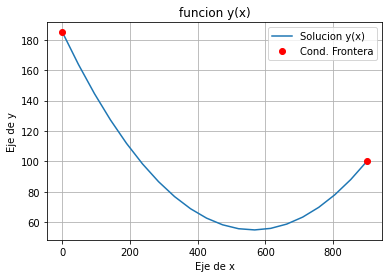

In [3]:
#Graficar resultados usando Matplotlib
y_x = y_sol[:,0]
#dy_t = y_sol[:,1]

plt.figure(1)
plt.plot(X, y_x,[X[0],X[-1]],[185,100],"ro")
plt.legend(["Solucion y(x)","Cond. Frontera"])
plt.title('funcion y(x)')
plt.xlabel('Eje de x')
plt.ylabel('Eje de y')
plt.grid(True)


plt.show()

# Metodo Busqueda de RAIZ

In [ ]:
# Funcion de una sola variable
# para cada valor u_1 calculo: u_o - c.frontera

from scipy import optimize

def RDisparo01(alfa):
  u_o = 185.0
  u_1 = alfa ##esta condicion se debe variar hasta que 
          ##se cumpla la otra condicion de frontera u_o(2)= 2.0
  Uo = [u_o, u_1]
  ##definir rango de solucion
  t_inicial = 0; t_final= 900.0; sample = 20
  T = np.linspace(t_inicial, t_final, sample)

  ##Solucionar la ED
  y_sol = odeint(FunCaten01, Uo, T)

  error = y_sol[-1,0]- 100.0
  return error

##solucion con algoritmo de busqueda de raices escalares.

Sol_disparo0 = optimize.newton(RDisparo01,0)
Sol_disparo1 = optimize.root(RDisparo01,0)
print("Newton: ",Sol_disparo0)
print("root: ",Sol_disparo1.x)


Newton:  -0.4678842197268268
root:  [-0.46788422]


# Lectura de archivo

In [4]:
Datos = np.loadtxt("Problema4_MN20221_MJ_P2.csv",delimiter=";")

Comparacion con resultados solucion.

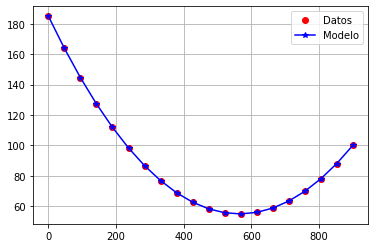

In [6]:
x_dato = Datos[:,0]
y_dato = Datos[:,1]

plt.plot(x_dato,y_dato,"ro")
plt.plot(X, y_x,"b*-")
plt.legend(["Datos","Modelo"])
plt.grid("on")

# Solucion Exacta

Funcion solucion de la catenaria

In [ ]:
def Catenaria_E01(x, wo=40,To=50000, C1=0, C2=0):
  """Funcion de la catenaria.
     Solucion exacta de la ecuacion diferencia
  """
  k1 = To/wo
  k2 = wo/To
  y_o = k1*(np.cosh(k2*x + C1) + C2)
  return y_o

Comparacion de la catenaria variando parametros de la funcion.

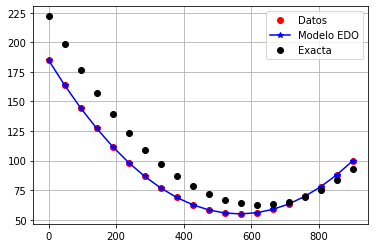

In [25]:


Y_modelo = Catenaria_E01(x_dato,wo=40, To=50000, C1=-0.5, C2=-.95)

plt.plot(x_dato,y_dato,"ro")
plt.plot(X, y_x,"b*-")
plt.plot(x_dato, Y_modelo, "ko")
plt.legend(["Datos","Modelo EDO","Exacta"])
plt.grid("on")

In [26]:
from scipy.integrate._ivp.radau import E
#Funcion de error usando Catenaria exacta
from scipy import optimize

def Error_Cat01(X, x_md, y_md):
  """X=[wo, To, C1, C2]
     k1 = To/wo
     k2 = wo/To
     y_o = k1*(np.cosh(k2*x + C1) + C2)##Catenaria_E01()
     
     x_md: lista datos de las medidas en x
     y_md: lista

  """
  W,T,c1,c2 = X

  Y_modelo = Catenaria_E01(x_md,wo=W,To=T,C1=c1, C2=c2)
  
  #calculo error cuadratico medio
  NN = len(x_md)
  er1=0
  for q in range(NN):
    ei2 = (Y_modelo[q]-y_md[q])**2
    er1 = er1 + ei2

  sme = er1/NN 
  return sme


In [50]:
Res = optimize.minimize(Error_Cat01,[2,2500,-0.5, -1],(x_dato, y_dato))


resultado[w,T,c1,c2]:  [ 2.00000219e+00  2.50000115e+03 -4.52303761e-01 -9.56045093e-01]


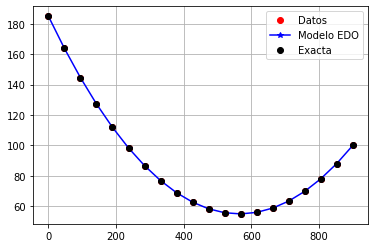

In [51]:
print("resultado[w,T,c1,c2]: ",Res.x)
Y_modelo = Catenaria_E01(x_dato,*Res.x)

plt.plot(x_dato,y_dato,"ro")
plt.plot(X, y_x,"b*-")
plt.plot(x_dato, Y_modelo, "ko")
plt.legend(["Datos","Modelo EDO","Exacta"])
plt.grid("on")

# Resultados y conclusiones

**Resultados y analisis:**


**Conclusiones:**


**Referencias:**

[Odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

[Burden&Faires 9ed](https://fac.ksu.edu.sa/sites/default/files/numerical_analysis_9th.pdf)

[Scipy-optim](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)